In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("concrete_data.csv")

In [4]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [5]:
df.sample(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1008,160.2,188.0,146.4,203.2,11.3,828.7,709.7,28,35.31
787,331.0,0.0,0.0,192.0,0.0,978.0,825.0,90,37.23
22,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,3,8.06


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
x = df.drop(columns='Strength')
y = df.iloc[:,-1]

In [11]:
x.sample(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
907,314.0,145.0,113.0,179.0,8.0,869.0,690.0,28
778,295.0,0.0,0.0,185.0,0.0,1069.0,769.0,7
927,157.0,214.0,152.0,200.0,9.0,819.0,704.0,28


In [13]:
x.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [14]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
x_train.count()
x_train = x_train+0.00000001

In [20]:
x_test.count()

Cement                309
Blast Furnace Slag    309
Fly Ash               309
Water                 309
Superplasticizer      309
Coarse Aggregate      309
Fine Aggregate        309
Age                   309
dtype: int64

In [23]:
y_test.count()

309

C:\Users\A\AppData\Local\Temp\ipykernel_7620\2961488374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


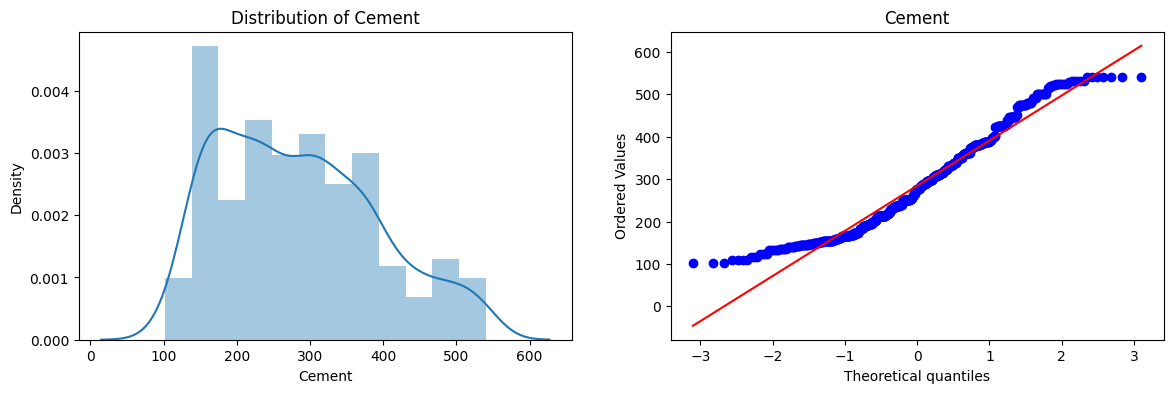

C:\Users\A\AppData\Local\Temp\ipykernel_7620\2961488374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


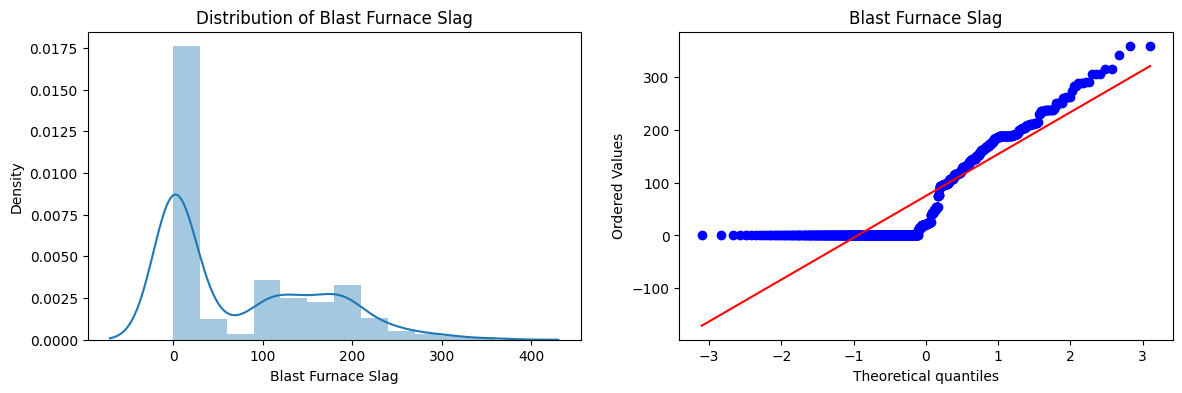

C:\Users\A\AppData\Local\Temp\ipykernel_7620\2961488374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


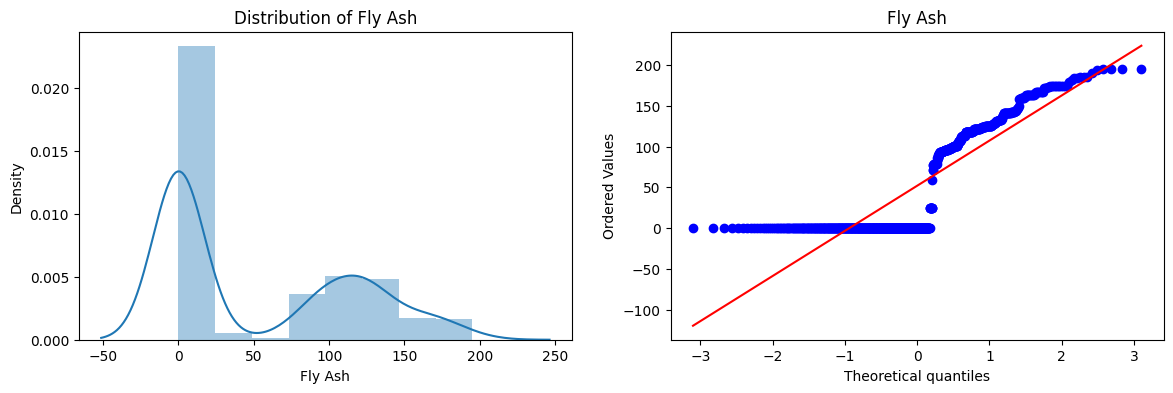

C:\Users\A\AppData\Local\Temp\ipykernel_7620\2961488374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


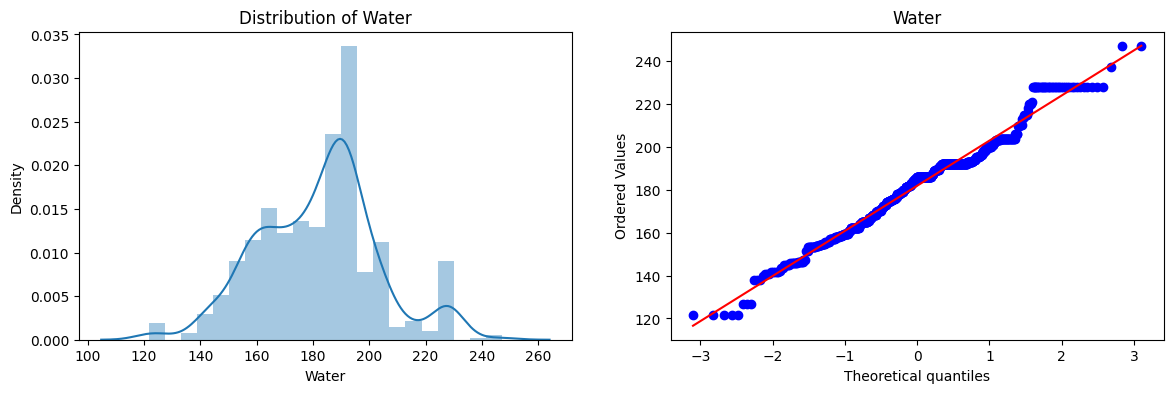

C:\Users\A\AppData\Local\Temp\ipykernel_7620\2961488374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


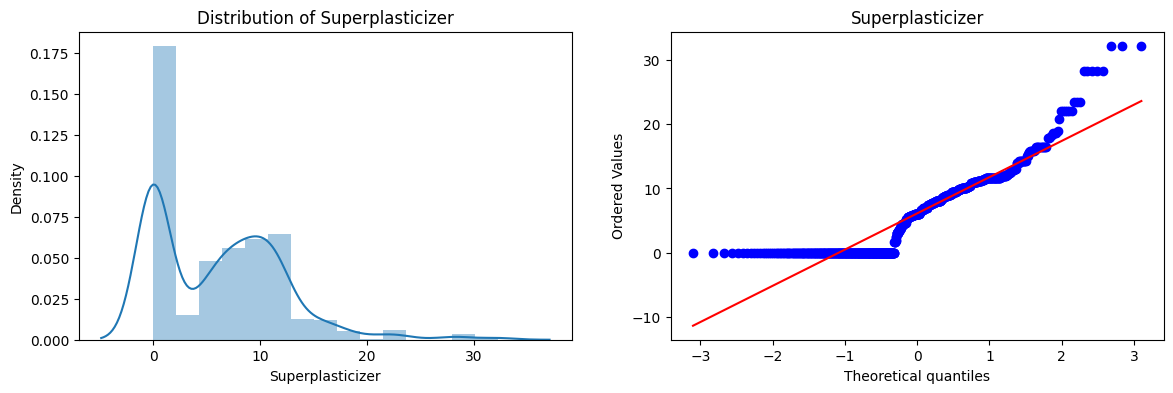

C:\Users\A\AppData\Local\Temp\ipykernel_7620\2961488374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


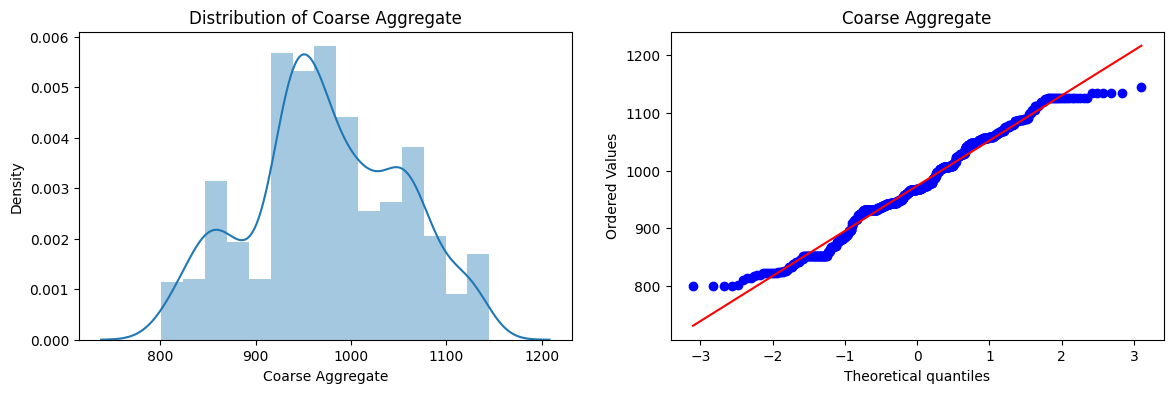

C:\Users\A\AppData\Local\Temp\ipykernel_7620\2961488374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


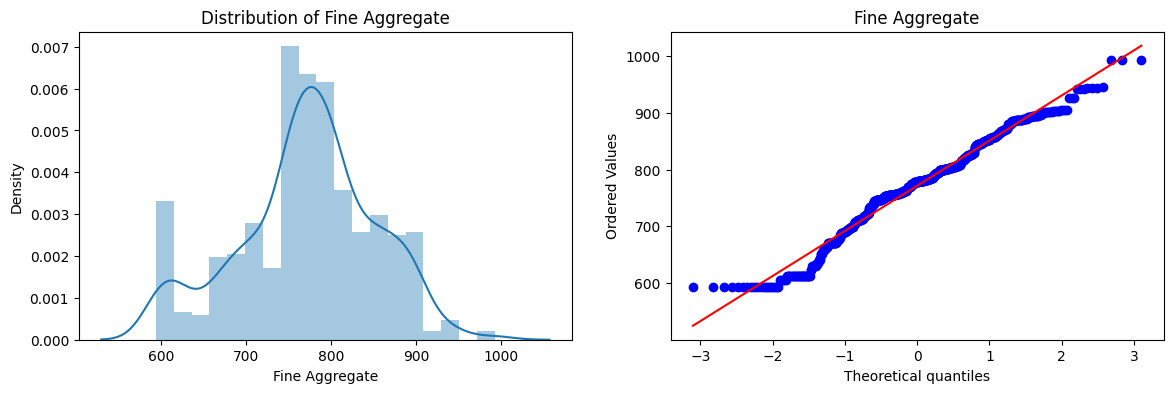

C:\Users\A\AppData\Local\Temp\ipykernel_7620\2961488374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


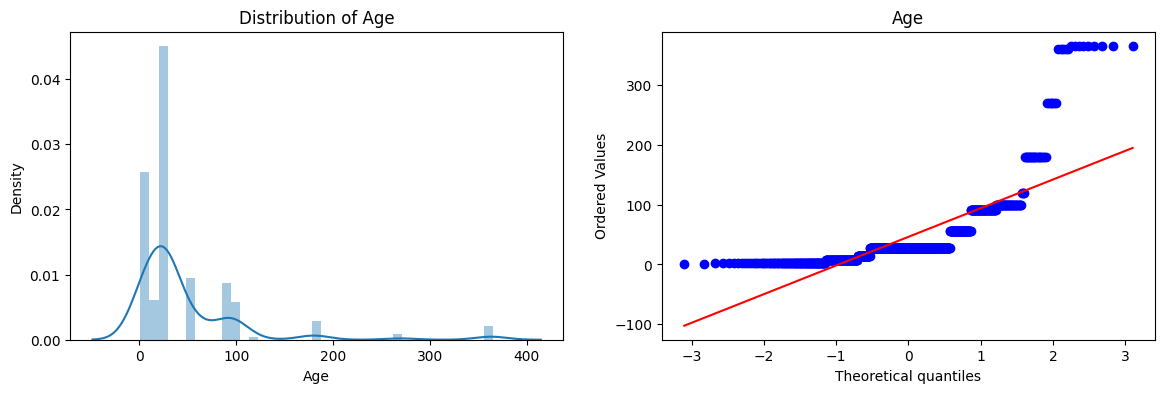

In [26]:
for col in x_train:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title('Distribution of ' + col)

    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()    

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 196 to 860
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              721 non-null    float64
 1   Blast Furnace Slag  721 non-null    float64
 2   Fly Ash             721 non-null    float64
 3   Water               721 non-null    float64
 4   Superplasticizer    721 non-null    float64
 5   Coarse Aggregate    721 non-null    float64
 6   Fine Aggregate      721 non-null    float64
 7   Age                 721 non-null    float64
dtypes: float64(8)
memory usage: 50.7 KB


In [38]:
x_test = x_test+0.00000001

In [42]:
trf1 = ColumnTransformer([
    ('power_transformation',PowerTransformer(),[0,1,2,3,4,5,6,7])
],remainder = 'passthrough')

In [43]:
trf2 = LinearRegression()

In [44]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [45]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power_transformation',
                                                  PowerTransformer(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('trf2', LinearRegression())])

In [46]:
y_pred = pipe.predict(x_test)

In [47]:
r2_score(y_test,y_pred=y_pred)

0.8006341181044917

In [50]:
cross_val_score(pipe,x_train,y_train,cv=10,scoring='r2').mean()

0.7915067277899532